In [2]:
import nltk

try:
    from rake_nltk import Rake
except LookupError:
    
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

In [51]:
import pandas as pd

In [77]:
papers = pd.read_json('../assets/cvpr-2023-main.json')

papers.head()
papers.to_csv('../assets/cvpr-2023-main.csv')

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words='english'
)

text = papers.title.astype(str) + '\n' + papers.abstract

t0 = time.time()
x_tfidf = vectorizer.fit_transform(text)

print(f'vectorization done in {time.time() - t0} s')
print(f'n_samples: {x_tfidf.shape[0]}, n_features: {x_tfidf.shape[1]}')


vectorization done in 0.46732378005981445 s
n_samples: 2359, n_features: 4316


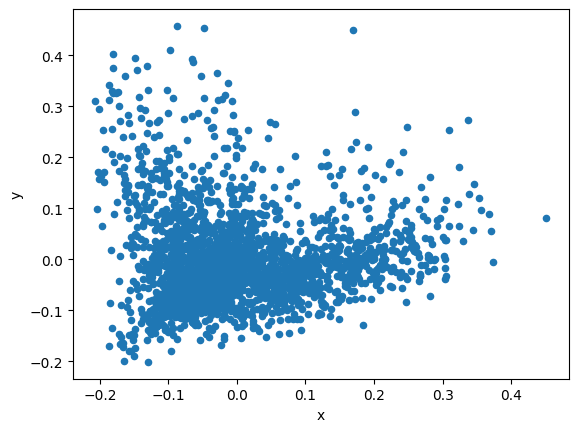

In [69]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd


pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(x_tfidf.toarray()), columns=list('xy'))

df.plot(kind='scatter', x='x', y='y')
plt.show()


In [75]:
from sklearn.cluster import DBSCAN
import numpy as np


vector = np.array(x_tfidf.toarray())
dbscan = DBSCAN(eps=0.7, min_samples=2, metric='cosine')
result = dbscan.fit_predict(vector)

papers['cluster'] = result
for cluster in set(result):
    if cluster == -1 or cluster == 0:
        continue
    
    tmp = papers[papers['cluster'] == cluster]
    print(f'cluster num: {cluster}')
    for i, t in enumerate(tmp['title']):
        print(i, t)
    print()
    
    

cluster num: 1
0 NoisyTwins: Class-Consistent and Diverse Image Generation Through StyleGANs
1 FEND: A Future Enhanced Distribution-Aware Contrastive Learning Framework for Long-Tail Trajectory Prediction
2 Use Your Head: Improving Long-Tail Video Recognition
3 RepMode: Learning to Re-Parameterize Diverse Experts for Subcellular Structure Prediction
4 Mod-Squad: Designing Mixtures of Experts As Modular Multi-Task Learners
5 Global and Local Mixture Consistency Cumulative Learning for Long-Tailed Visual Recognitions
6 Rethinking Image Super Resolution From Long-Tailed Distribution Learning Perspective
7 Curvature-Balanced Feature Manifold Learning for Long-Tailed Classification
8 Transfer Knowledge From Head to Tail: Uncertainty Calibration Under Long-Tailed Distribution
9 Unsupervised Sampling Promoting for Stochastic Human Trajectory Prediction
10 Balancing Logit Variation for Long-Tailed Semantic Segmentation
11 SuperDisco: Super-Class Discovery Improves Visual Recognition for the Lo